# GROUP '' Predicting Housing prices in Canada

## Installing Python package 📦 manager for data manipulation and analysis that provides data structures like DataFrames.¶

In [1]:
pip install emoji --upgrade

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\abc\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\abc\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install matplotlib numpy

You should consider upgrading via the 'C:\Users\abc\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## Importing libraries. 📖 📓¶

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Loading the data. 💻¶

In [5]:
df = pd.read_csv('Merged_Final.csv')

## Data Understanding - Exploring the data. 🌍 🔭¶

In [6]:
print(df.head())

     REF_DATE      GEO  ImmigrationCount  HouseCount  PopulationCount   CPI  \
0  01-01-1992  Alberta             51627        1005           870595  79.8   
1  01-02-1992  Alberta             51201        1005           870595  80.0   
2  01-03-1992  Alberta             52846        1005           870595  80.4   
3  01-04-1992  Alberta             55102        1201           873590  80.3   
4  01-05-1992  Alberta             55597        1201           873590  80.4   

   HousePriceIndex  
0             36.1  
1             36.0  
2             36.4  
3             36.4  
4             36.6  


In [7]:
# Summary of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   REF_DATE          3240 non-null   object 
 1   GEO               3240 non-null   object 
 2   ImmigrationCount  3240 non-null   int64  
 3   HouseCount        3240 non-null   int64  
 4   PopulationCount   3240 non-null   int64  
 5   CPI               3240 non-null   float64
 6   HousePriceIndex   3240 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 177.3+ KB
None


In [8]:
# Summary of numerical columns
print(df.describe())

       ImmigrationCount   HouseCount  PopulationCount          CPI  \
count      3.240000e+03  3240.000000     3.240000e+03  3240.000000   
mean       3.048062e+05  1650.269444     1.210856e+06   110.491790   
std        5.523675e+05  1824.076486     1.307146e+06    18.083884   
min        1.800000e+01    41.000000     1.696820e+05    79.600000   
25%        1.647150e+04   259.500000     3.109128e+05    93.200000   
50%        7.349100e+04   514.000000     3.947450e+05   110.300000   
75%        3.042798e+05  2737.250000     1.565197e+06   125.825000   
max        2.812196e+06  9275.000000     4.979438e+06   151.700000   

       HousePriceIndex  
count      3240.000000  
mean         78.771543  
std          22.796645  
min          33.500000  
25%          55.900000  
50%          84.800000  
75%          98.200000  
max         144.100000  


In [9]:
# Checking for missing values
print(df.isnull().sum())

REF_DATE            0
GEO                 0
ImmigrationCount    0
HouseCount          0
PopulationCount     0
CPI                 0
HousePriceIndex     0
dtype: int64


In [10]:
# Number of records and features

df.shape

(3240, 7)

In [11]:
# List of Columns.

df.columns

Index(['REF_DATE', 'GEO', 'ImmigrationCount', 'HouseCount', 'PopulationCount',
       'CPI', 'HousePriceIndex'],
      dtype='object')

## Converting Date feature 🕖

In [12]:
# Convert REF_DATE to datetime
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%d-%m-%Y')

# Verify data types
print(df.dtypes)

REF_DATE            datetime64[ns]
GEO                         object
ImmigrationCount             int64
HouseCount                   int64
PopulationCount              int64
CPI                        float64
HousePriceIndex            float64
dtype: object


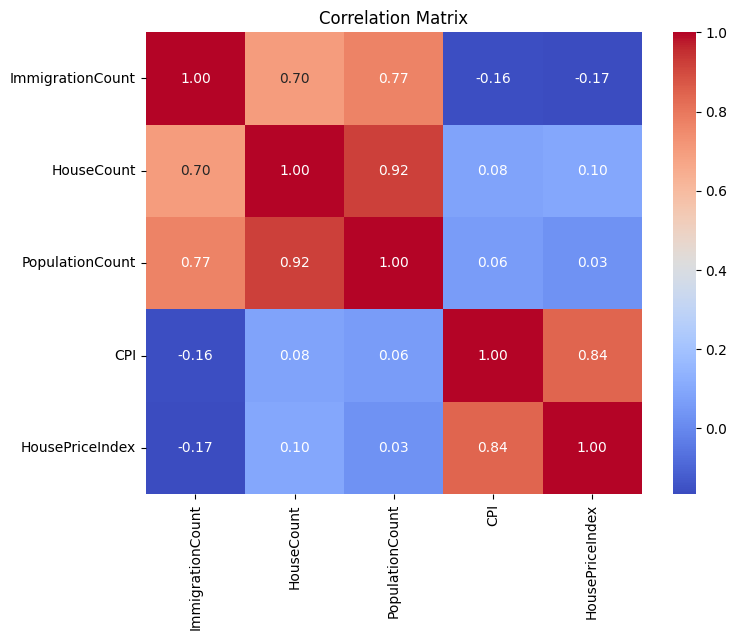

In [13]:
correlation_matrix = df.drop(columns=['REF_DATE']).corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [14]:
print(correlation_matrix)

                  ImmigrationCount  HouseCount  PopulationCount       CPI  \
ImmigrationCount          1.000000    0.702224         0.770587 -0.161480   
HouseCount                0.702224    1.000000         0.921212  0.080199   
PopulationCount           0.770587    0.921212         1.000000  0.059493   
CPI                      -0.161480    0.080199         0.059493  1.000000   
HousePriceIndex          -0.166040    0.095320         0.028649  0.842324   

                  HousePriceIndex  
ImmigrationCount        -0.166040  
HouseCount               0.095320  
PopulationCount          0.028649  
CPI                      0.842324  
HousePriceIndex          1.000000  


The correlation analysis shows some important connections in the data: population growth is closely linked to housing demand, shown by a high correlation (0.92) between HouseCount and PopulationCount. This suggests that as the population grows, the need for housing also increases. Additionally, there’s a strong correlation (0.84) between the Consumer Price Index (CPI) and the House Price Index, meaning that as general prices rise, housing costs tend to go up as well, which can impact affordability. Immigration also plays a role, with moderate correlations to both population (0.77) and housing demand (0.70), showing that immigration contributes to growth in these areas, though it doesn’t directly influence CPI or housing prices as much. Overall, these patterns highlight how population growth, immigration, and economic factors all influence housing demand and affordability.

In [15]:
print(df.head())

    REF_DATE      GEO  ImmigrationCount  HouseCount  PopulationCount   CPI  \
0 1992-01-01  Alberta             51627        1005           870595  79.8   
1 1992-02-01  Alberta             51201        1005           870595  80.0   
2 1992-03-01  Alberta             52846        1005           870595  80.4   
3 1992-04-01  Alberta             55102        1201           873590  80.3   
4 1992-05-01  Alberta             55597        1201           873590  80.4   

   HousePriceIndex  
0             36.1  
1             36.0  
2             36.4  
3             36.4  
4             36.6  


In [16]:
df_encoded = pd.get_dummies(df, columns=['GEO'], drop_first=False)

In [17]:
print(df_encoded)

       REF_DATE  ImmigrationCount  HouseCount  PopulationCount    CPI  \
0    1992-01-01             51627        1005           870595   79.8   
1    1992-02-01             51201        1005           870595   80.0   
2    1992-03-01             52846        1005           870595   80.4   
3    1992-04-01             55102        1201           873590   80.3   
4    1992-05-01             55597        1201           873590   80.4   
...         ...               ...         ...              ...    ...   
3235 2021-08-01              2475         335           389237  144.9   
3236 2021-09-01              3161         335           389237  145.4   
3237 2021-10-01              3270         299           389597  146.1   
3238 2021-11-01              3366         299           389597  146.8   
3239 2021-12-01              3933         299           389597  145.9   

      HousePriceIndex  GEO_Alberta  GEO_British Columbia  GEO_Manitoba  \
0                36.1            1               

In [18]:
# Converting 'REF_DATE' to datetime format if not already
df_encoded['REF_DATE'] = pd.to_datetime(df_encoded['REF_DATE'])

# Extracting 'Year', 'Month', 'Day', and 'DayOfYear' from 'REF_DATE'
df_encoded['Year'] = df_encoded['REF_DATE'].dt.year
df_encoded['Month'] = df_encoded['REF_DATE'].dt.month
df_encoded['Day'] = df_encoded['REF_DATE'].dt.day
df_encoded['DayOfYear'] = df_encoded['REF_DATE'].dt.dayofyear

X = df_encoded[['ImmigrationCount', 'HouseCount', 'PopulationCount', 'CPI', 'Year', 'Month', 'Day', 'DayOfYear',
                'GEO_Alberta', 'GEO_British Columbia', 'GEO_Manitoba', 'GEO_New Brunswick', 
                'GEO_Newfoundland and Labrador', 'GEO_Nova Scotia', 'GEO_Ontario', 'GEO_Quebec', 'GEO_Saskatchewan']]

y = df_encoded['HousePriceIndex']

# Adding a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fitting the model and applying backward selection
model = sm.OLS(y, X).fit()

# Function to remove features using backward selection
def backward_selection(X, y, model, threshold=0.05):
    while True:
        # Get the p-values of the model
        p_values = model.pvalues
        # Find the feature with the highest p-value
        max_p_value = p_values.max()
        if max_p_value > threshold:
            # Remove the feature with the highest p-value
            feature_to_remove = p_values.idxmax()
            print(f"Dropping feature {feature_to_remove} with p-value {max_p_value}")
            X = X.drop(columns=[feature_to_remove])
            model = sm.OLS(y, X).fit()  # Refit the model with the remaining features
        else:
            break  # Stop if all p-values are below the threshold
    return model, X

# Applying backward selection
model, X_selected = backward_selection(X, y, model)

# Summary of the model after backward selection
print(model.summary())

Dropping feature PopulationCount with p-value 0.2785513408711409
                            OLS Regression Results                            
Dep. Variable:        HousePriceIndex   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1886.
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:10:45   Log-Likelihood:                -11134.
No. Observations:                3240   AIC:                         2.230e+04
Df Residuals:                    3225   BIC:                         2.239e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

The model explains 89.1% of the variance in HousePriceIndex, which is pretty good. The adjusted R-squared being close to the R-squared means we’re not overfitting. The F-statistic shows the model as a whole is statistically significant, meaning some predictors actually matter for predicting house prices.

Predictors with high p-values (like PopulationCount, which was removed) don’t add much to the model and can be dropped.

There’s a warning about multicollinearity, meaning some predictors are too similar and may affect model stability. 

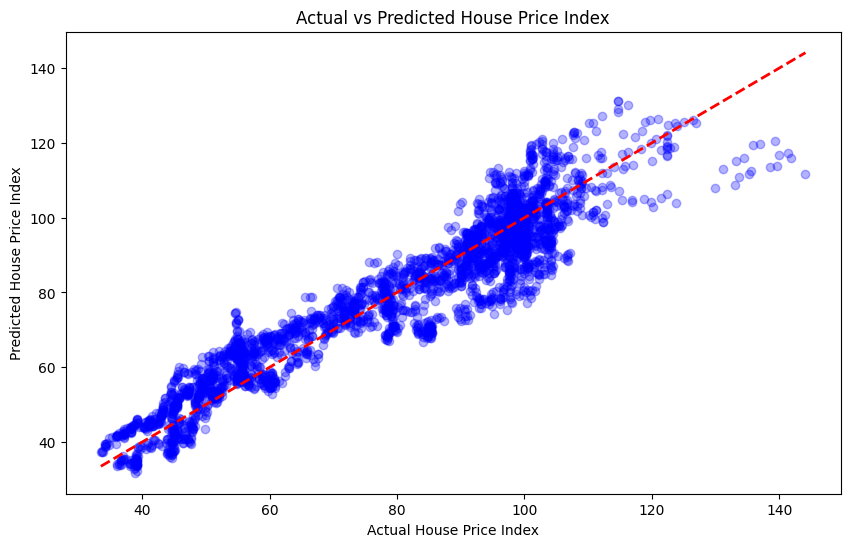

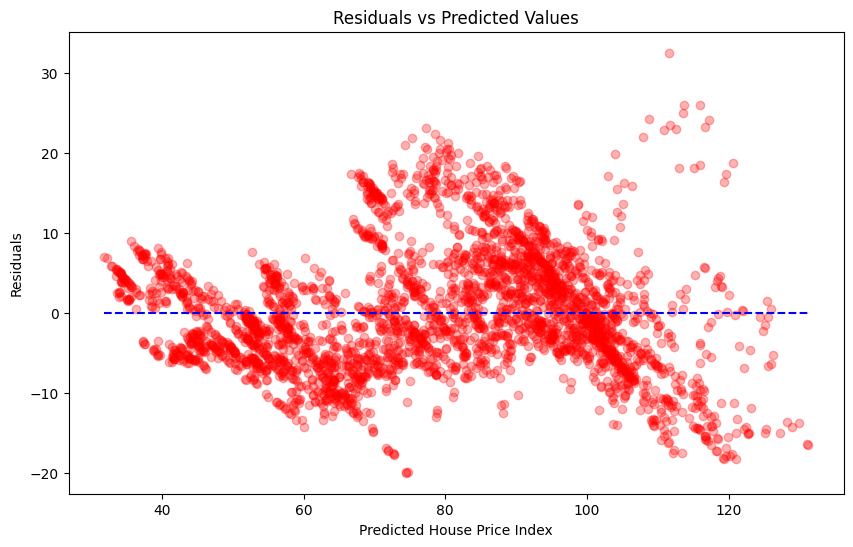

In [19]:
# Actual vs Predicted Plot
y_pred = model.predict(X_selected)  # Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.3, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual House Price Index')
plt.ylabel('Predicted House Price Index')
plt.title('Actual vs Predicted House Price Index')
plt.show()

# Residuals Plot
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3, color='red')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='blue', linestyles='dashed')
plt.xlabel('Predicted House Price Index')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()



In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for all the feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Removing features with high VIF
def remove_high_vif_features(X, threshold=10.0):
    while True:
        vif_data = calculate_vif(X)
        max_vif = vif_data["VIF"].max()
        
        if max_vif > threshold:
            # Find the feature with the highest VIF
            feature_to_remove = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
            print(f"Dropping feature {feature_to_remove} with VIF {max_vif}")
            # Drop the feature with the highest VIF
            X = X.drop(columns=[feature_to_remove])
        else:
            break
    return X

# Dropping 'const' column before calculating VIF
X_vif = X.drop(columns=['const'])

# Removing high-VIF features and getting the remaining dataset
X_vif_selected = remove_high_vif_features(X_vif)

# Now adding the constant term back for model fitting
X_vif_selected = sm.add_constant(X_vif_selected)

# Refitting the model with the selected features
model_vif = sm.OLS(y, X_vif_selected).fit()

# Model summary
print(model_vif.summary())

Dropping feature GEO_New Brunswick with VIF 295406.5229069724
Dropping feature PopulationCount with VIF 322.5479402056366
Dropping feature Year with VIF 57.49119927000979
Dropping feature GEO_Ontario with VIF 16.29580976864352
                            OLS Regression Results                            
Dep. Variable:        HousePriceIndex   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1927.
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:16:05   Log-Likelihood:                -11582.
No. Observations:                3240   AIC:                         2.319e+04
Df Residuals:                    3229   BIC:                         2.325e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                         

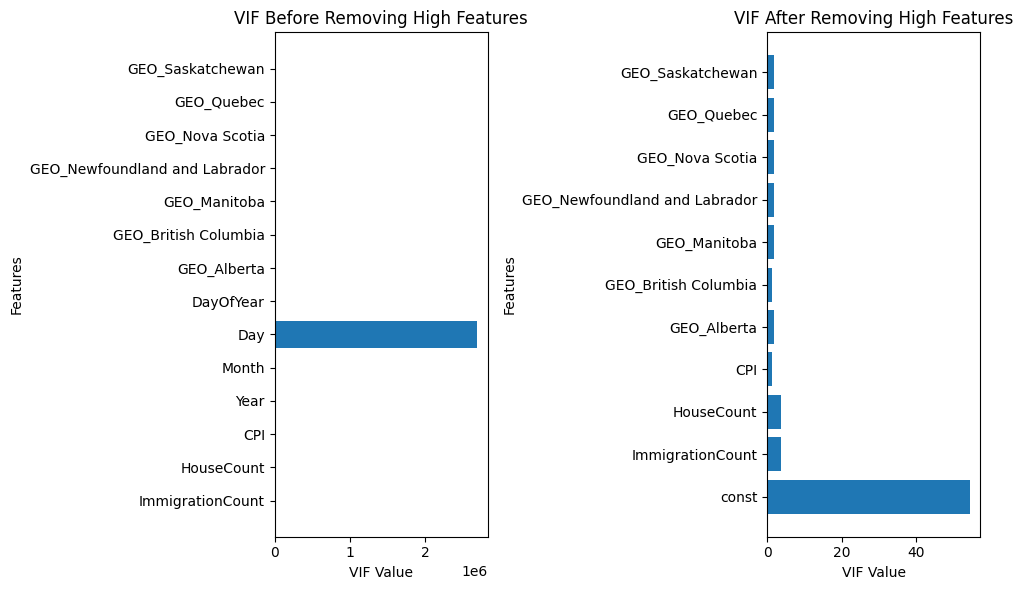

In [32]:
import matplotlib.pyplot as plt

# Calculating VIF for original features
vif_original = calculate_vif(X)

# Calculating VIF after dropping high VIF features
vif_selected = calculate_vif(X_vif_selected)

# Ploting VIF before and after removal
plt.figure(figsize=(10, 6))

# Plotting VIF of original features
plt.subplot(1, 2, 1)
plt.barh(vif_original["Feature"], vif_original["VIF"])
plt.title("VIF Before Removing High Features")
plt.xlabel("VIF Value")
plt.ylabel("Features")

# Plotting VIF after removal
plt.subplot(1, 2, 2)
plt.barh(vif_selected["Feature"], vif_selected["VIF"])
plt.title("VIF After Removing High Features")
plt.xlabel("VIF Value")
plt.ylabel("Features")

plt.tight_layout()
plt.show()

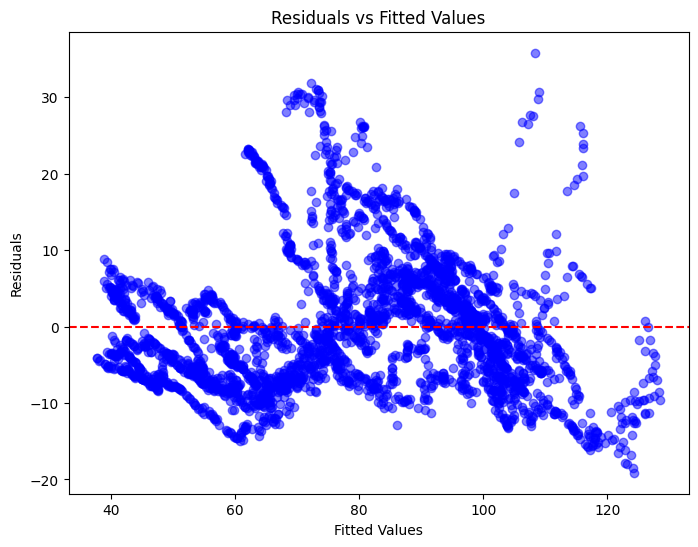

In [33]:
# Residuals from the fitted model
residuals = model_vif.resid

plt.figure(figsize=(8, 6))
plt.scatter(model_vif.fittedvalues, residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

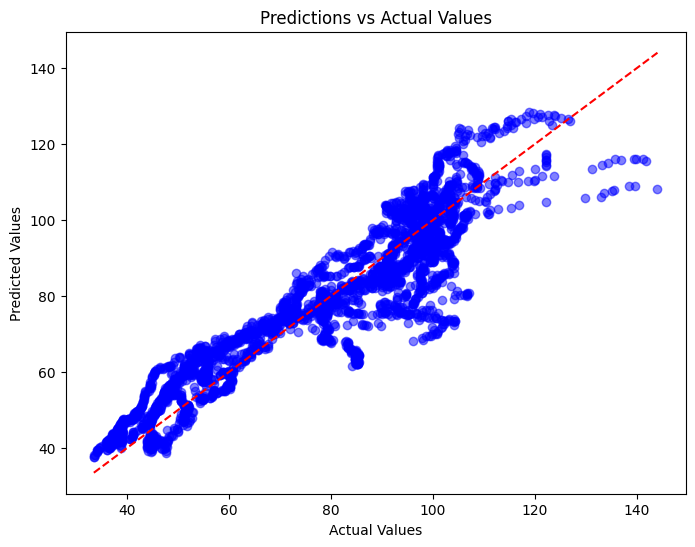

In [34]:
# Getting predicted values
y_pred_vif = model_vif.fittedvalues

# Plotting predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_vif, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title("Predictions vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

After trying both Ridge and Lasso techniques for normalization,we came to a conclusion the OLS model after taking out features with high VIF performs better for the current dataset